### Context
- This dataset contains lot of historical sales data. It was extracted from a Brazilian top retailer and has many SKUs and many stores. The data was transformed to protect the identity of the retailer.


### Background
- Walmart is a renowned retail corporation that operates a chain of hypermarkets. Here, Walmart has provided a data combining of 45 stores including store information and monthly sales. The data is provided on weekly basis. Walmart tries to find the impact of holidays on the sales of store. For which it has included four holidays’ weeks into the dataset which are Christmas, Thanksgiving, Super bowl, Labor Day. Here we are owing to Analyze the dataset given. Before doing that, let me point out the objective of this analysis.

### Business Objectives
- Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor. Most importantly how inclusion of holidays in a week soars the sales in store.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the Dataset

In [2]:
df=pd.read_csv("Retail Sales Forecasting.csv")
df

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,...,8.106,A,151315,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420208,421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420209,421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012
420210,421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,...,8.667,B,118221,False,False,False,False,43,10,2012


### Drop Unnecessary Columns

In [3]:
df=df.drop(['Unnamed: 0'],axis=1)

In [4]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.00,0.00,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420207,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420208,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420209,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420210,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012


### Read the first five rows

In [5]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010


### Read the last five rows

In [6]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
420207,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420208,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420209,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420210,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012
420211,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,...,8.667,B,118221,False,False,False,False,43,10,2012


### Checking the Null Values

In [7]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
week            0
month           0
year            0
dtype: int64

### Check the Duplicate Values

In [8]:
df.duplicated().sum()

0

### Statistical Information about the Data

In [9]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,week,month,year
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,25.828408,6.449866,2010.968454
std,12.787236,30.508819,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,14.152489,3.243397,0.796898
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.000000,1.000000,2010.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,14.000000,4.000000,2010.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,26.000000,6.000000,2011.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,38.000000,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,12.000000,2012.000000


### Information about the Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   MarkDown1     420212 non-null  float64
 8   MarkDown2     420212 non-null  float64
 9   MarkDown3     420212 non-null  float64
 10  MarkDown4     420212 non-null  float64
 11  MarkDown5     420212 non-null  float64
 12  CPI           420212 non-null  float64
 13  Unemployment  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
 16  Super_Bowl    420212 non-null  bool   
 17  Labor_Day     420212 non-null  bool   
 18  Than

### Correlation

In [11]:
df.corr()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Store,1.000000,0.024258,-0.085117,-0.000522,-0.050230,0.065321,-0.059970,-0.033727,-0.020301,-0.042808,...,-0.211261,0.208759,-0.182763,-0.000802,0.000230,-0.000238,-0.000196,0.000926,0.000907,0.002831
Dept,0.024258,1.000000,0.148749,0.000663,0.004727,0.003544,0.001454,0.000435,0.001517,0.001881,...,-0.007178,0.007787,-0.002491,0.000553,-0.000273,0.000904,0.000190,0.000767,0.000800,0.003716
Weekly_Sales,-0.085117,0.148749,1.000000,0.012843,-0.002339,0.000089,0.047249,0.020948,0.038522,0.037470,...,-0.021162,-0.025806,0.244117,0.002492,-0.000639,0.032872,-0.007345,0.027659,0.028401,-0.010015
IsHoliday,-0.000522,0.000663,0.012843,1.000000,-0.155775,-0.078155,-0.003517,0.207326,0.266731,0.011625,...,-0.001933,0.010555,0.000797,0.533922,0.532661,0.435528,0.434151,0.127846,0.123058,-0.056572
Temperature,-0.050230,0.004727,-0.002339,-0.155775,1.000000,0.143700,-0.026428,-0.179684,-0.056016,-0.050323,...,0.182223,0.096768,-0.058413,-0.202115,0.111899,-0.076906,-0.150713,0.236256,0.235957,0.065712
Fuel_Price,0.065321,0.003544,0.000089,-0.078155,0.143700,1.000000,0.297075,0.029282,0.018646,0.166645,...,-0.164199,-0.033915,0.003632,-0.076497,0.018297,-0.047034,-0.051451,-0.031191,-0.040931,0.779681
MarkDown1,-0.059970,0.001454,0.047249,-0.003517,-0.026428,0.297075,1.000000,0.175005,-0.014425,0.838866,...,0.010915,-0.105257,0.169891,0.029585,0.009931,-0.045460,-0.010259,-0.093640,-0.089261,0.501068
MarkDown2,-0.033727,0.000435,0.020948,0.207326,-0.179684,0.029282,0.175005,1.000000,-0.006090,0.113446,...,-0.003694,-0.041497,0.078392,0.019358,-0.025109,-0.018645,0.475938,-0.013070,-0.019602,0.132026
MarkDown3,-0.020301,0.001517,0.038522,0.266731,-0.056016,0.018646,-0.014425,-0.006090,1.000000,-0.012031,...,-0.005959,-0.018078,0.033671,-0.011777,-0.011733,0.614428,-0.008344,0.122398,0.116100,0.006802
MarkDown4,-0.042808,0.001881,0.037470,0.011625,-0.050323,0.166645,0.838866,0.113446,-0.012031,1.000000,...,-0.002061,-0.076583,0.127415,0.080763,-0.015149,-0.032412,-0.022399,-0.114217,-0.105607,0.335360


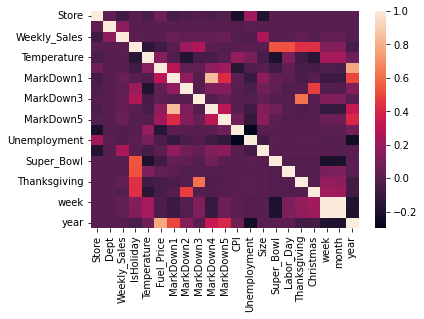

In [12]:
sns.heatmap(df.corr())
plt.show()

In [13]:
df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
Super_Bowl         bool
Labor_Day          bool
Thanksgiving       bool
Christmas          bool
week              int64
month             int64
year              int64
dtype: object

### Changing data to datetime for decomposing

In [14]:
df["Date"] = pd.to_datetime(df["Date"])

In [15]:
df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Super_Bowl                bool
Labor_Day                 bool
Thanksgiving              bool
Christmas                 bool
week                     int64
month                    int64
year                     int64
dtype: object

In [16]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010


### Setting date as index

In [17]:
df.set_index('Date', inplace=True) 

In [18]:
df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,2,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,3,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,4,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010
2010-02-05,1,5,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,...,8.106,A,151315,False,False,False,False,5,2,2010


### Plotting Sales - with the original Data

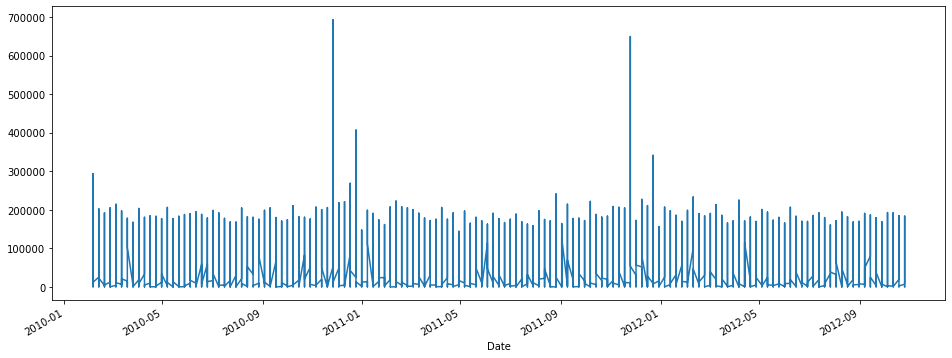

In [19]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In this data, there are lots of same data values. So, I will collect them together as weekly.

### Resampling of Weekly Data

In [20]:
df_week = df.resample('W').mean() #resample data as weekly

In [21]:
df_week

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.040394,44.161236,16887.602166,0.0,33.282800,2.717968,0.000000,0.000000,0.000000,0.000000,...,167.328549,8.578592,137381.684997,0.0,0.0,0.0,0.0,5.0,2.0,2010.0
2010-02-14,22.006443,44.331638,16390.912208,1.0,33.370444,2.695955,0.000000,0.000000,0.000000,0.000000,...,167.401961,8.567855,137675.080027,1.0,0.0,0.0,0.0,6.0,2.0,2010.0
2010-02-21,22.044444,44.287542,16255.185970,0.0,37.032596,2.673506,0.000000,0.000000,0.000000,0.000000,...,167.386208,8.574593,137277.810101,0.0,0.0,0.0,0.0,7.0,2.0,2010.0
2010-02-28,22.021088,44.058844,14955.932194,0.0,38.624806,2.685486,0.000000,0.000000,0.000000,0.000000,...,167.708233,8.562094,137365.977551,0.0,0.0,0.0,0.0,8.0,2.0,2010.0
2010-03-07,22.056199,44.019755,15964.821240,0.0,42.367490,2.731923,0.000000,0.000000,0.000000,0.000000,...,167.680036,8.573890,137556.273161,0.0,0.0,0.0,0.0,9.0,3.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,22.227981,44.099932,14815.621125,0.0,68.163750,3.858017,4895.531619,19.071321,5.247659,1700.566721,...,175.983576,7.222354,136080.131775,0.0,0.0,0.0,0.0,39.0,9.0,2012.0
2012-10-07,22.250506,44.518543,16037.442175,0.0,65.444187,3.848344,5044.741224,0.000000,19.995620,2810.671477,...,176.007152,6.940703,136517.424140,0.0,0.0,0.0,0.0,40.0,10.0,2012.0
2012-10-14,22.203760,44.574018,15484.696200,0.0,57.678090,3.896989,1956.173911,0.000000,16.775955,557.068587,...,176.161362,6.949037,136284.739846,0.0,0.0,0.0,0.0,41.0,10.0,2012.0


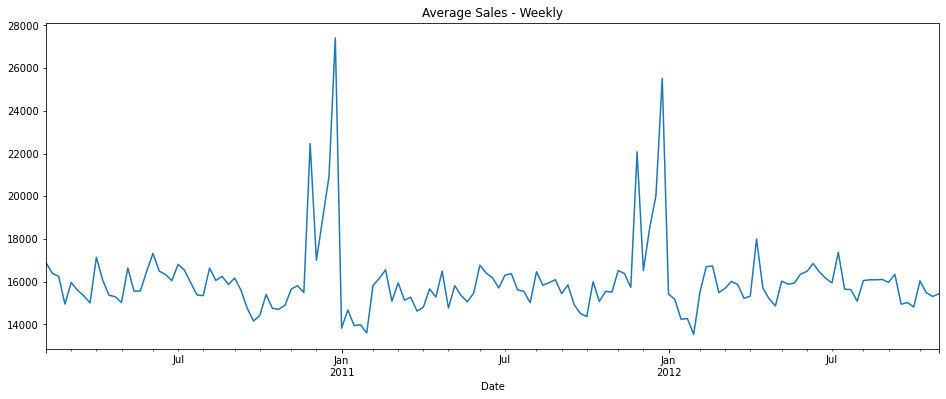

In [22]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

With the collecting data as weekly, I can see average sales clearly. To see monthly pattern , I resampled my data to monthly also.

### Resampling Monthly Data

In [23]:
df_month = df.resample('M').mean() #resample data as Monthly

In [24]:
df_month

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-28,22.028124,44.210080,16123.339183,0.249809,35.578510,2.693193,0.000000,0.000000,0.000000,0.000000,...,167.455953,8.570795,137424.932232,0.249809,0.000000,0.000000,0.000000,6.500127,2.0,2010.0
2010-03-31,22.076498,44.068584,15480.222209,0.000000,46.695948,2.786435,0.000000,0.000000,0.000000,0.000000,...,167.557149,8.574451,137338.023230,0.000000,0.000000,0.000000,0.000000,10.500000,3.0,2010.0
2010-04-30,22.087864,44.149396,15786.479121,0.000000,56.409791,2.867522,0.000000,0.000000,0.000000,0.000000,...,167.255377,8.446639,137358.674534,0.000000,0.000000,0.000000,0.000000,14.993929,4.0,2010.0
2010-05-31,22.149273,44.298116,16063.976174,0.000000,64.884550,2.917179,0.000000,0.000000,0.000000,0.000000,...,167.267314,8.451819,137351.455218,0.000000,0.000000,0.000000,0.000000,19.496860,5.0,2010.0
2010-06-30,22.218080,44.227551,16551.606753,0.000000,74.595153,2.787978,0.000000,0.000000,0.000000,0.000000,...,167.634269,8.452569,136958.451916,0.000000,0.000000,0.000000,0.000000,23.501593,6.0,2010.0
2010-07-31,22.186881,44.343681,16009.268745,0.000000,78.923568,2.773209,0.000000,0.000000,0.000000,0.000000,...,167.591153,8.382136,137169.741534,0.000000,0.000000,0.000000,0.000000,28.001445,7.0,2010.0
2010-08-31,22.204854,44.199067,16205.333619,0.000000,78.445074,2.781558,0.000000,0.000000,0.000000,0.000000,...,167.830106,8.384989,137038.399344,0.000000,0.000000,0.000000,0.000000,32.499611,8.0,2010.0
2010-09-30,22.173913,43.952841,15172.175282,0.250342,72.300494,2.733204,0.000000,0.000000,0.000000,0.000000,...,167.918809,8.381297,136968.363317,0.000000,0.250342,0.000000,0.000000,36.500171,9.0,2010.0
2010-10-31,22.168227,43.988452,14839.055563,0.000000,61.640780,2.807052,0.000000,0.000000,0.000000,0.000000,...,168.182292,8.429495,136781.138914,0.000000,0.000000,0.000000,0.000000,41.000000,10.0,2010.0


In [25]:
#df_month = df.resample('MS').mean() # resampling as monthly

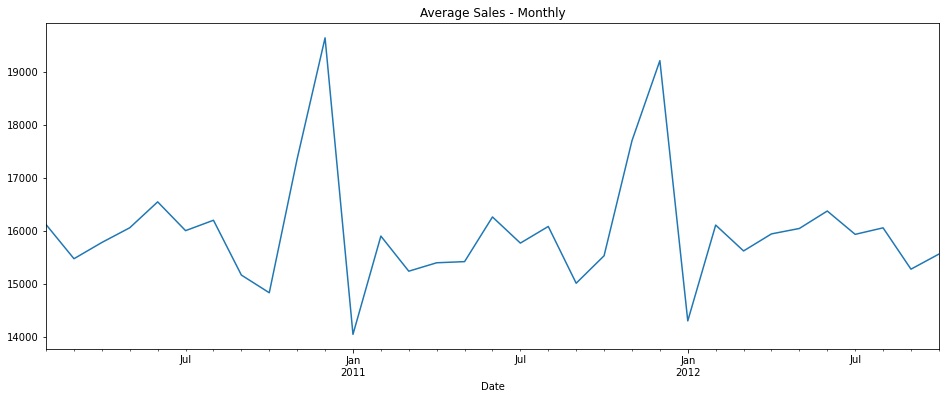

In [26]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

### For Resampling SEMI Month End

In [27]:
df_semi_month = df.resample('MS').mean() # resampling as semi monthly

In [28]:
df_semi_month

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,22.028124,44.210080,16123.339183,0.249809,35.578510,2.693193,0.000000,0.000000,0.000000,0.000000,...,167.455953,8.570795,137424.932232,0.249809,0.000000,0.000000,0.000000,6.500127,2.0,2010.0
2010-03-01,22.076498,44.068584,15480.222209,0.000000,46.695948,2.786435,0.000000,0.000000,0.000000,0.000000,...,167.557149,8.574451,137338.023230,0.000000,0.000000,0.000000,0.000000,10.500000,3.0,2010.0
2010-04-01,22.087864,44.149396,15786.479121,0.000000,56.409791,2.867522,0.000000,0.000000,0.000000,0.000000,...,167.255377,8.446639,137358.674534,0.000000,0.000000,0.000000,0.000000,14.993929,4.0,2010.0
2010-05-01,22.149273,44.298116,16063.976174,0.000000,64.884550,2.917179,0.000000,0.000000,0.000000,0.000000,...,167.267314,8.451819,137351.455218,0.000000,0.000000,0.000000,0.000000,19.496860,5.0,2010.0
2010-06-01,22.218080,44.227551,16551.606753,0.000000,74.595153,2.787978,0.000000,0.000000,0.000000,0.000000,...,167.634269,8.452569,136958.451916,0.000000,0.000000,0.000000,0.000000,23.501593,6.0,2010.0
2010-07-01,22.186881,44.343681,16009.268745,0.000000,78.923568,2.773209,0.000000,0.000000,0.000000,0.000000,...,167.591153,8.382136,137169.741534,0.000000,0.000000,0.000000,0.000000,28.001445,7.0,2010.0
2010-08-01,22.204854,44.199067,16205.333619,0.000000,78.445074,2.781558,0.000000,0.000000,0.000000,0.000000,...,167.830106,8.384989,137038.399344,0.000000,0.000000,0.000000,0.000000,32.499611,8.0,2010.0
2010-09-01,22.173913,43.952841,15172.175282,0.250342,72.300494,2.733204,0.000000,0.000000,0.000000,0.000000,...,167.918809,8.381297,136968.363317,0.000000,0.250342,0.000000,0.000000,36.500171,9.0,2010.0
2010-10-01,22.168227,43.988452,14839.055563,0.000000,61.640780,2.807052,0.000000,0.000000,0.000000,0.000000,...,168.182292,8.429495,136781.138914,0.000000,0.000000,0.000000,0.000000,41.000000,10.0,2010.0


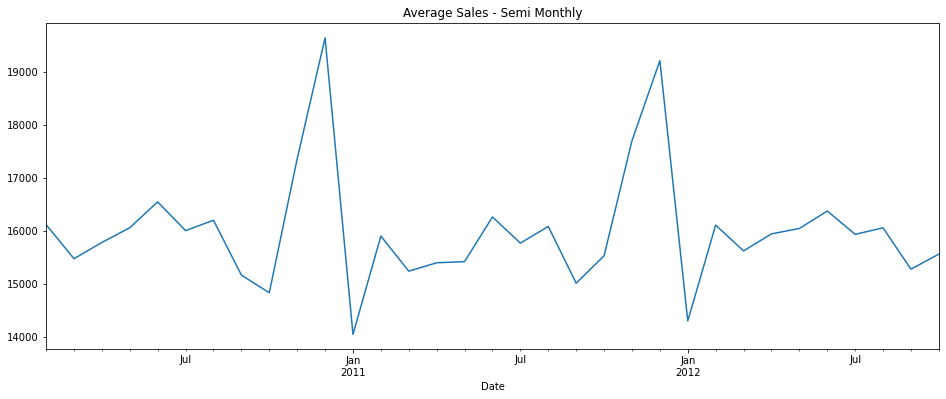

In [29]:
plt.figure(figsize=(16,6))
df_semi_month['Weekly_Sales'].plot()
plt.title('Average Sales - Semi Monthly')
plt.show()

### Resampling of Quarter

In [30]:
df_quarter = df.resample('Q').mean() # resampling as quarter

In [31]:
df_quarter

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,22.052256,44.139491,15802.504158,0.125186,41.124723,2.739709,0.000000,0.000000,0.000000,0.000000,...,167.506437,8.572619,137381.575498,0.125186,0.000000,0.000000,0.000000,8.495564,2.498875,2010.0
2010-06-30,22.146608,44.218962,16106.090322,0.000000,64.582604,2.858372,0.000000,0.000000,0.000000,0.000000,...,167.375164,8.450045,137233.796686,0.000000,0.000000,0.000000,0.000000,18.982479,4.919677,2010.0
2010-09-30,22.188378,44.178535,15810.534527,0.077399,76.729276,2.763398,0.000000,0.000000,0.000000,0.000000,...,167.765670,8.382751,137067.237914,0.000000,0.077399,0.000000,0.000000,32.007250,7.924744,2010.0
2010-12-31,22.169726,43.997855,17279.574766,0.142714,50.037238,2.895795,0.000000,0.000000,0.000000,0.000000,...,168.185645,8.429100,136891.767205,0.000000,0.000000,0.071430,0.071284,45.507228,11.001609,2010.0
2011-03-31,22.161243,44.039201,15070.972629,0.083412,39.810587,3.271263,0.000000,0.000000,0.000000,0.000000,...,169.184186,8.240936,136959.624192,0.083412,0.000000,0.000000,0.000000,6.512825,2.003331,2011.0
2011-06-30,22.224992,44.130072,15674.560511,0.000000,63.878750,3.835369,0.000000,0.000000,0.000000,0.000000,...,170.854231,8.102369,136684.694296,0.000000,0.000000,0.000000,0.000000,18.988728,4.920310,2011.0
2011-09-30,22.251463,44.176275,15592.918830,0.071944,77.255045,3.678790,0.000000,0.000000,0.000000,0.000000,...,171.491444,8.052895,136771.777997,0.000000,0.071944,0.000000,0.000000,32.514803,8.003195,2011.0
2011-12-31,22.164921,44.429037,17627.826240,0.155221,49.185036,3.437665,2770.677251,4048.546247,4930.653127,831.526018,...,173.026985,7.766113,136450.288042,0.000000,0.000000,0.078011,0.077210,46.027883,11.082719,2011.0
2012-03-31,22.210649,44.313561,15373.799664,0.077690,45.248419,3.590893,9700.094368,4757.349196,48.603058,5447.597730,...,174.353466,7.483828,136358.027505,0.077690,0.000000,0.000000,0.000000,7.001427,2.078131,2012.0


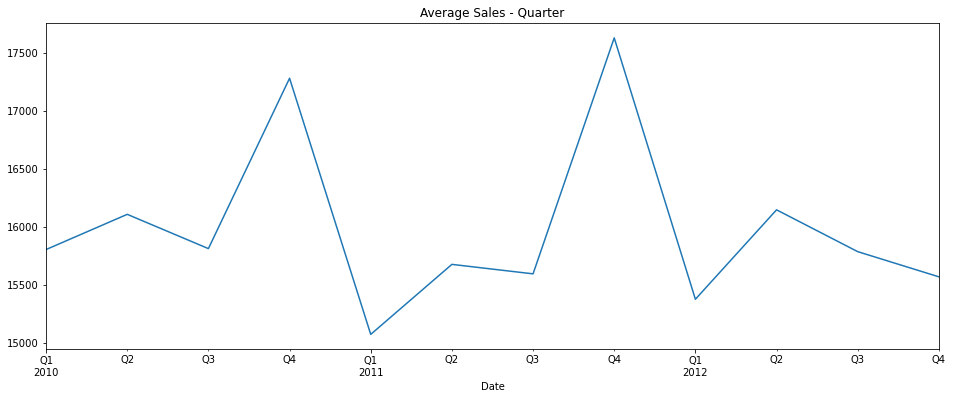

In [32]:
plt.figure(figsize=(16,6))
df_quarter['Weekly_Sales'].plot()
plt.title('Average Sales - Quarter')
plt.show()

When I turned data to monthly, I realized that I lost some patterns in weekly data. So, I will continue with weekly resampled data.

### To Observe 2-weeks Rolling Mean and Std

My data is non-stationary. So, I will try to find more stationary version on it.

In [33]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

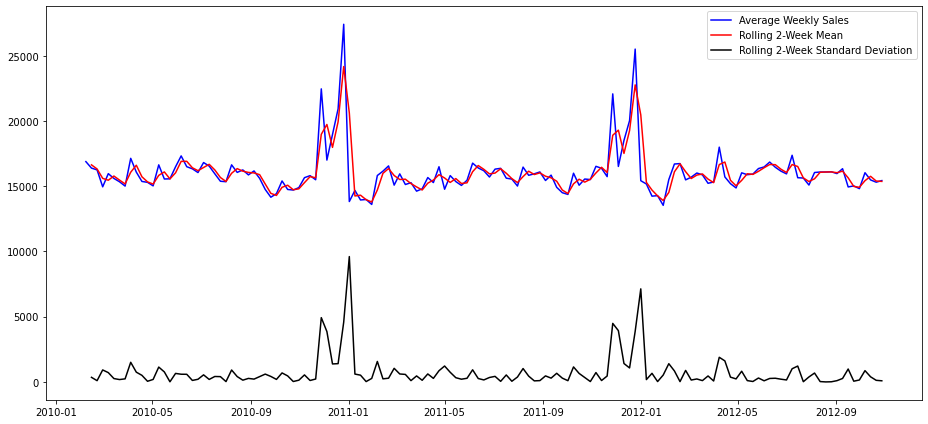

In [34]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

### Adfuller Test to Make Sure

In [35]:
from statsmodels.tsa.stattools import adfuller

In [36]:
adfuller(df_week['Weekly_Sales'])

(-5.927107223737575,
 2.429049208204191e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '5%': -2.882721765644168,
  '10%': -2.578065326612056},
 2261.596421168073)

#### Add a Dataframe

From test and my observations my data is not stationary. So, I will try to find more stationary version of it.

### Train - Test Split of Weekly Data

In [37]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 21)
Test: (43, 21)


### All columns except price

In [38]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] 

In [39]:
type(used_cols)

list

In [40]:
used_cols

['Store',
 'Dept',
 'IsHoliday',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Size',
 'Super_Bowl',
 'Labor_Day',
 'Thanksgiving',
 'Christmas',
 'week',
 'month',
 'year']

In [41]:
# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [42]:
X_train

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,
2010-02-07,22.040394,44.161236,0.0,33.282800,2.717968,0.000000,0.000000,0.000000,0.000000,0.000000,167.328549,8.578592,137381.684997,0.0,0.0,0.0,0.0,5.0,2.0,2010.0
2010-02-14,22.006443,44.331638,1.0,33.370444,2.695955,0.000000,0.000000,0.000000,0.000000,0.000000,167.401961,8.567855,137675.080027,1.0,0.0,0.0,0.0,6.0,2.0,2010.0
2010-02-21,22.044444,44.287542,0.0,37.032596,2.673506,0.000000,0.000000,0.000000,0.000000,0.000000,167.386208,8.574593,137277.810101,0.0,0.0,0.0,0.0,7.0,2.0,2010.0
2010-02-28,22.021088,44.058844,0.0,38.624806,2.685486,0.000000,0.000000,0.000000,0.000000,0.000000,167.708233,8.562094,137365.977551,0.0,0.0,0.0,0.0,8.0,2.0,2010.0
2010-03-07,22.056199,44.019755,0.0,42.367490,2.731923,0.000000,0.000000,0.000000,0.000000,0.000000,167.680036,8.573890,137556.273161,0.0,0.0,0.0,0.0,9.0,3.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-04,22.176589,44.468562,0.0,45.620211,3.396139,4564.297375,77.139555,3591.739953,2709.845217,18692.618358,173.008818,7.773589,136320.525753,0.0,0.0,0.0,0.0,48.0,12.0,2011.0
2011-12-11,22.198600,44.693769,0.0,37.948737,3.363338,4655.367614,26.454692,338.066271,2326.262333,9723.775528,173.245926,7.769220,136189.639787,0.0,0.0,0.0,0.0,49.0,12.0,2011.0
2011-12-18,22.169667,44.696333,0.0,40.618243,3.335765,3192.691327,62.372197,726.737090,549.652043,4054.178953,173.529024,7.763204,136188.219667,0.0,0.0,0.0,0.0,50.0,12.0,2011.0


In [43]:
X_test

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
Date,,,,,,,,,,,,,,,,,,,,
2012-01-08,22.209585,44.198110,0.0,40.504192,3.301503,5040.404624,22507.521357,118.433544,1034.812187,5206.331461,173.790619,7.479572,136172.263247,0.0,0.0,0.0,0.0,1.0,1.0,2012.0
2012-01-15,22.262962,44.186377,0.0,39.176394,3.372671,3440.712965,9845.892430,73.826682,527.123816,3849.257174,173.798155,7.486994,136183.444256,0.0,0.0,0.0,0.0,2.0,1.0,2012.0
2012-01-22,22.148286,44.247031,0.0,39.005721,3.392789,2438.475931,3324.163013,72.461992,657.491595,2841.615914,174.077685,7.485220,136565.618595,0.0,0.0,0.0,0.0,3.0,1.0,2012.0
2012-01-29,22.123344,44.223242,0.0,42.087221,3.411365,1495.729344,1750.840241,72.398631,100.287261,2682.030883,174.114263,7.476301,136572.486239,0.0,0.0,0.0,0.0,4.0,1.0,2012.0
2012-02-05,22.156513,44.576910,0.0,44.219616,3.453386,38291.940882,2998.731111,150.681531,30485.963134,6241.746802,174.196761,7.488011,136591.557051,0.0,0.0,0.0,0.0,5.0,2.0,2012.0
2012-02-12,22.249499,44.586840,1.0,39.203026,3.501062,11290.348854,4587.804947,74.355224,9560.419542,6060.409626,174.201381,7.481547,136628.679025,1.0,0.0,0.0,0.0,6.0,2.0,2012.0
2012-02-19,22.165722,44.729243,0.0,39.588439,3.562541,11598.095215,8301.056786,18.439920,6557.618286,6028.416992,174.371646,7.483033,136530.579527,0.0,0.0,0.0,0.0,7.0,2.0,2012.0
2012-02-26,22.225042,44.163452,0.0,44.484284,3.618984,9433.795286,5925.571851,4.513753,2884.763936,5884.360755,174.300917,7.484344,136386.905922,0.0,0.0,0.0,0.0,8.0,2.0,2012.0
2012-03-04,22.282652,44.487609,0.0,44.828433,3.695653,16666.274240,1603.805368,28.482210,11463.419930,3537.968533,174.420091,7.483160,136263.898192,0.0,0.0,0.0,0.0,9.0,3.0,2012.0


In [44]:
y_train

Date
2010-02-07    16887.602166
2010-02-14    16390.912208
2010-02-21    16255.185970
2010-02-28    14955.932194
2010-03-07    15964.821240
                  ...     
2011-12-04    16518.598642
2011-12-11    18514.347794
2011-12-18    20028.907720
2011-12-25    25513.510129
2012-01-01    15425.226436
Freq: W-SUN, Name: Weekly_Sales, Length: 100, dtype: float64

In [45]:
y_test

Date
2012-01-08    15172.381502
2012-01-15    14240.431552
2012-01-22    14279.630241
2012-01-29    13535.547791
2012-02-05    15511.884823
2012-02-12    16703.472478
2012-02-19    16738.021167
2012-02-26    15489.637807
2012-03-04    15693.684826
2012-03-11    16014.393926
2012-03-18    15872.204816
2012-03-25    15226.518413
2012-04-01    15326.020460
2012-04-08    17996.123801
2012-04-15    15716.104725
2012-04-22    15196.634396
2012-04-29    14869.835139
2012-05-06    16028.727724
2012-05-13    15885.859584
2012-05-20    15932.240504
2012-05-27    16356.881537
2012-06-03    16478.487007
2012-06-10    16853.811124
2012-06-17    16455.669143
2012-06-24    16158.774298
2012-07-01    15947.071632
2012-07-08    17374.110380
2012-07-15    15653.784727
2012-07-22    15629.411697
2012-07-29    15091.508648
2012-08-05    16053.456116
2012-08-12    16090.911806
2012-08-19    16090.857333
2012-08-26    16106.388534
2012-09-02    15970.176590
2012-09-09    16344.419692
2012-09-16    14946.569

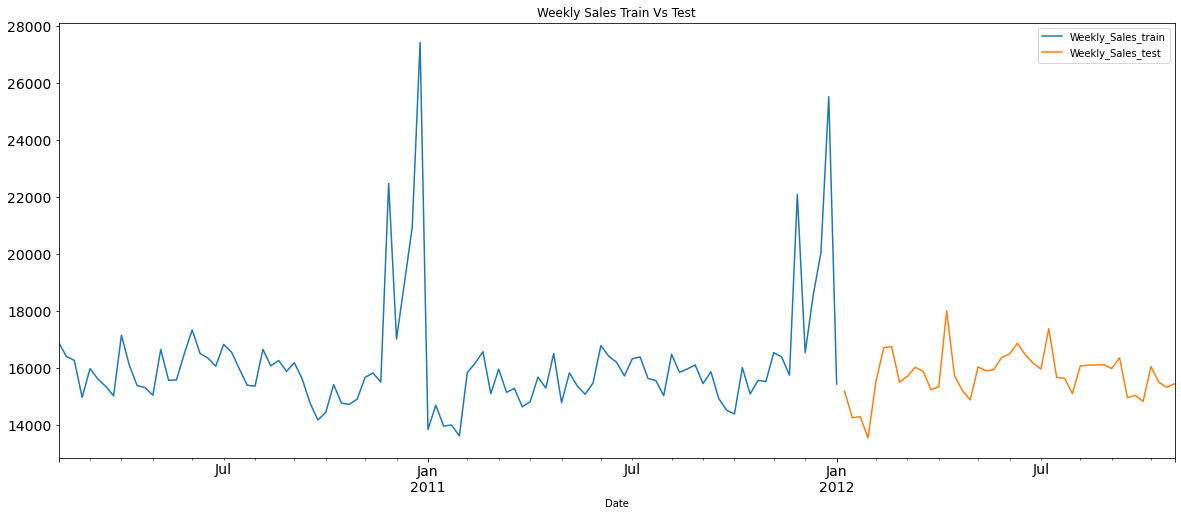

In [46]:
train_data['Weekly_Sales'].plot(figsize=(20,8), label= 'Weekly_Sales_train', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), label= 'Weekly_Sales_test', fontsize=14)
plt.title('Weekly Sales Train Vs Test')
plt.legend()
plt.show()

### Decomposing Weekly Data to Observe Seasonality

In [47]:
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

In [48]:
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

In [49]:
decomposed

decomposed(x=array([16887.60216565, 16390.91220753, 16255.1859697 , 14955.93219388,
       15964.82123978, 15600.14990489, 15344.28083902, 15011.76309524,
       17139.43991162, 16083.35019015, 15368.60635714, 15299.0944015 ,
       15029.58878267, 16639.25365009, 15555.98710021, 15569.44466529,
       16490.94393301, 17324.39337245, 16497.64538806, 16336.94380446,
       16050.02743457, 16816.07200756, 16545.67815889, 15957.1994755 ,
       15383.53189513, 15347.95544704, 16639.71462893, 16060.98440373,
       16250.57462707, 15869.41330453, 16173.69926662, 15601.85253333,
       14754.02428425, 14159.42210544, 14431.17103177, 15405.76667691,
       14752.61861197, 14708.59198429, 14896.92140417, 15657.41577633,
       15812.44450806, 15496.83184753, 22464.57892833, 17005.32868825,
       18953.98026217, 20935.08901118, 27415.84898374, 13828.57059508,
       14679.58732327, 13948.50856653, 13985.16006536, 13603.70199244,
       15822.2868495 , 16155.91020478, 16558.86970088, 15085.818

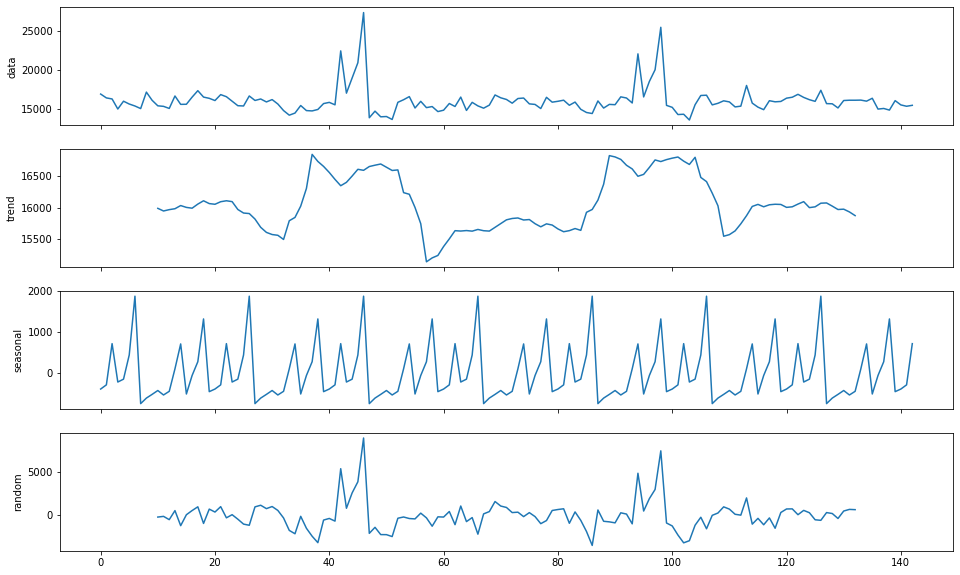

In [50]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

From the graphs above, every 20 step seasonality converges to beginning point. This helps me to tune my model.

### Trying To Make Data More Stationary

1. Difference

In [51]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [52]:
df_week_diff

Date
2010-02-14    -496.689958
2010-02-21    -135.726238
2010-02-28   -1299.253776
2010-03-07    1008.889046
2010-03-14    -364.671335
                 ...     
2012-09-30    -209.764065
2012-10-07    1221.821050
2012-10-14    -552.745975
2012-10-21    -173.381656
2012-10-28     122.226470
Freq: W-SUN, Name: Weekly_Sales, Length: 142, dtype: float64

In [53]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

In [54]:
diff_roll_mean

Date
2010-02-14           NaN
2010-02-21   -316.208098
2010-02-28   -717.490007
2010-03-07   -145.182365
2010-03-14    322.108856
                 ...    
2012-09-30    -65.473980
2012-10-07    506.028492
2012-10-14    334.537538
2012-10-21   -363.063816
2012-10-28    -25.577593
Freq: W-SUN, Name: Weekly_Sales, Length: 142, dtype: float64

In [55]:
diff_roll_std

Date
2010-02-14            NaN
2010-02-21     255.239894
2010-02-28     822.738212
2010-03-07    1632.103441
2010-03-14     971.253860
                 ...     
2012-09-30     204.056996
2012-10-07    1012.283543
2012-10-14    1254.808377
2012-10-21     268.251082
2012-10-28     209.026511
Freq: W-SUN, Name: Weekly_Sales, Length: 142, dtype: float64

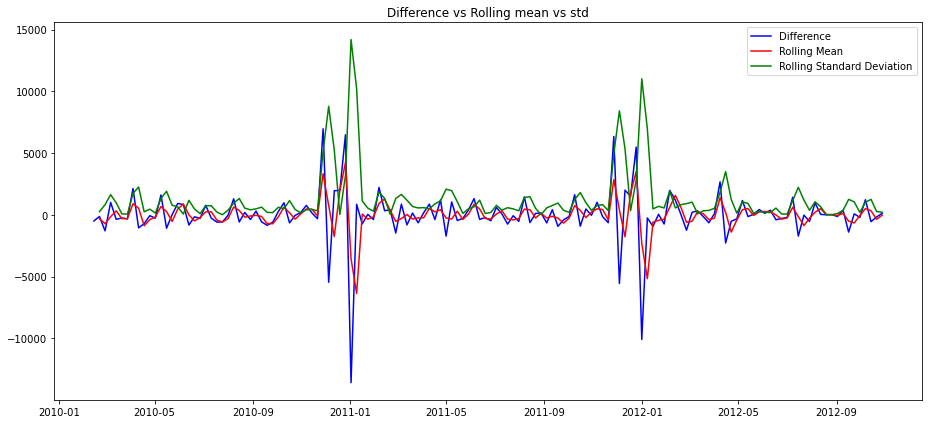

In [56]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='green', label='Rolling Standard Deviation')
ax.legend()
plt.title('Difference vs Rolling mean vs std')
fig.tight_layout()

2.Shift

In [57]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [58]:
df_week_lag

Date
2010-02-14    16887.602166
2010-02-21    16390.912208
2010-02-28    16255.185970
2010-03-07    14955.932194
2010-03-14    15964.821240
                  ...     
2012-09-30    15025.385190
2012-10-07    14815.621125
2012-10-14    16037.442175
2012-10-21    15484.696200
2012-10-28    15311.314544
Freq: W-SUN, Name: Weekly_Sales, Length: 142, dtype: float64

In [59]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

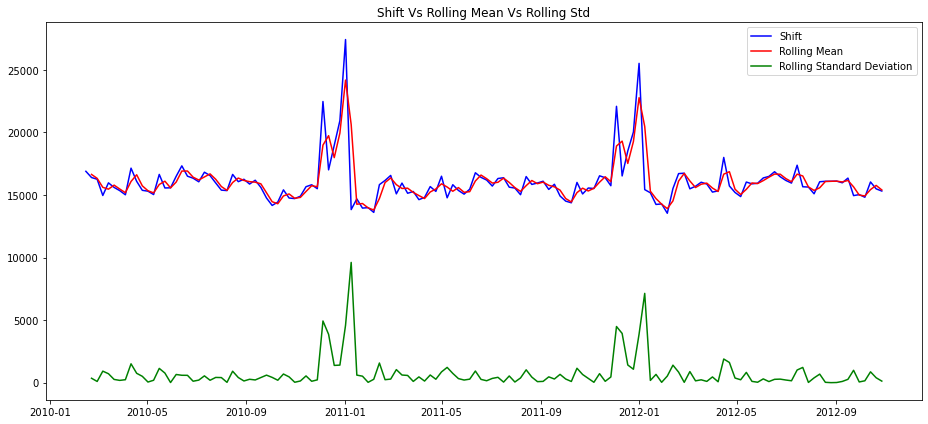

In [60]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Shift')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='green', label='Rolling Standard Deviation')
plt.title('Shift Vs Rolling Mean Vs Rolling Std')
ax.legend()
fig.tight_layout()

3.Log

In [61]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [62]:
logged_week

Date
2010-02-07    9.734394
2010-02-14    9.704543
2010-02-21    9.696229
2010-02-28    9.612930
2010-03-07    9.678206
                ...   
2012-09-30    9.603505
2012-10-07    9.682744
2012-10-14    9.647672
2012-10-21    9.636413
2012-10-28    9.644363
Freq: W-SUN, Name: Weekly_Sales, Length: 143, dtype: float64

In [63]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

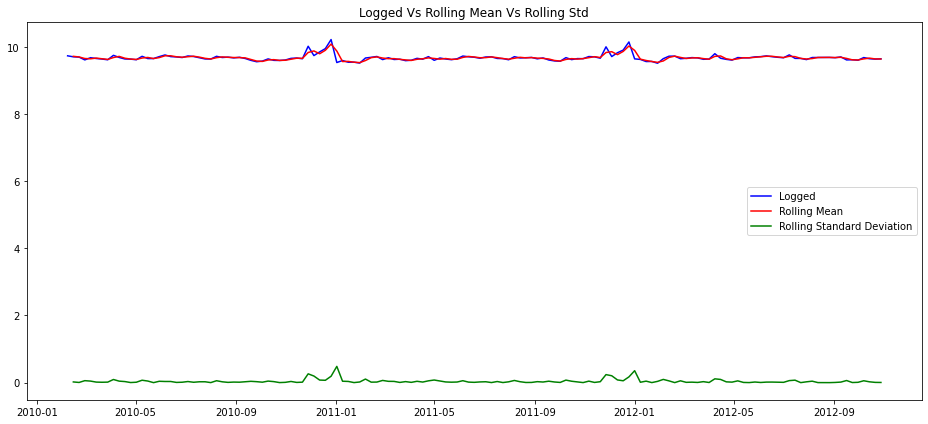

In [64]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='green', label='Rolling Standard Deviation')
plt.title('Logged Vs Rolling Mean Vs Rolling Std')
ax.legend()
fig.tight_layout()

### Auto-ARIMA MODEL
- I tried my data without any changes, then tried with shifting, taking log and difference version of data. Differenced data gave best results. So, I decided to take difference and use this data.

### Train-Test Split

In [65]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [66]:
train_data_diff

Date
2010-02-14     -496.689958
2010-02-21     -135.726238
2010-02-28    -1299.253776
2010-03-07     1008.889046
2010-03-14     -364.671335
                  ...     
2011-12-04    -5561.585658
2011-12-11     1995.749152
2011-12-18     1514.559926
2011-12-25     5484.602409
2012-01-01   -10088.283694
Freq: W-SUN, Name: Weekly_Sales, Length: 99, dtype: float64

In [67]:
train_data_diff.shape

(99,)

In [68]:
test_data_diff

Date
2012-01-08    -252.844934
2012-01-15    -931.949950
2012-01-22      39.198689
2012-01-29    -744.082450
2012-02-05    1976.337032
2012-02-12    1191.587655
2012-02-19      34.548689
2012-02-26   -1248.383360
2012-03-04     204.047019
2012-03-11     320.709100
2012-03-18    -142.189110
2012-03-25    -645.686403
2012-04-01      99.502048
2012-04-08    2670.103340
2012-04-15   -2280.019076
2012-04-22    -519.470329
2012-04-29    -326.799257
2012-05-06    1158.892585
2012-05-13    -142.868141
2012-05-20      46.380920
2012-05-27     424.641033
2012-06-03     121.605470
2012-06-10     375.324117
2012-06-17    -398.141980
2012-06-24    -296.894845
2012-07-01    -211.702666
2012-07-08    1427.038747
2012-07-15   -1720.325653
2012-07-22     -24.373030
2012-07-29    -537.903048
2012-08-05     961.947467
2012-08-12      37.455690
2012-08-19      -0.054473
2012-08-26      15.531201
2012-09-02    -136.211944
2012-09-09     374.243102
2012-09-16   -1397.850608
2012-09-23      78.816106
2012-09

In [69]:
test_data_diff.shape

(43,)

In [70]:
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.32 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [71]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))

In [72]:
y_pred

2012-01-08    4630.996102
2012-01-15     174.626611
2012-01-22    1246.304939
2012-01-29   -4896.143721
2012-02-05    5039.895131
2012-02-12   -1739.676360
2012-02-19    -182.147006
2012-02-26   -1030.364842
2012-03-04    2850.079337
2012-03-11   -2378.695213
2012-03-18     623.003820
2012-03-25     120.559162
2012-04-01     806.077803
2012-04-08   -1543.842104
2012-04-15    1124.464954
2012-04-22    -145.468539
2012-04-29      11.290623
2012-05-06    -511.952856
2012-05-13     858.228425
2012-05-20    -461.318804
2012-05-27      47.629233
2012-06-03     -11.555619
2012-06-10     361.984743
2012-06-17    -409.696464
2012-06-24     221.651188
2012-07-01      30.829576
2012-07-08      67.234181
2012-07-15    -183.868461
2012-07-22     236.803987
2012-07-29     -54.654895
2012-08-05      11.144528
2012-08-12     -19.402531
2012-08-19     140.891136
2012-08-26     -81.335656
2012-09-02      47.939514
2012-09-09      27.439828
2012-09-16      53.447710
2012-09-23     -44.404959
2012-09-30  

In [73]:
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])

In [74]:
y_pred

,Prediction
Date,
2012-01-08,4630.996102
2012-01-15,174.626611
2012-01-22,1246.304939
2012-01-29,-4896.143721
2012-02-05,5039.895131
2012-02-12,-1739.676360
2012-02-19,-182.147006
2012-02-26,-1030.364842
2012-03-04,2850.079337


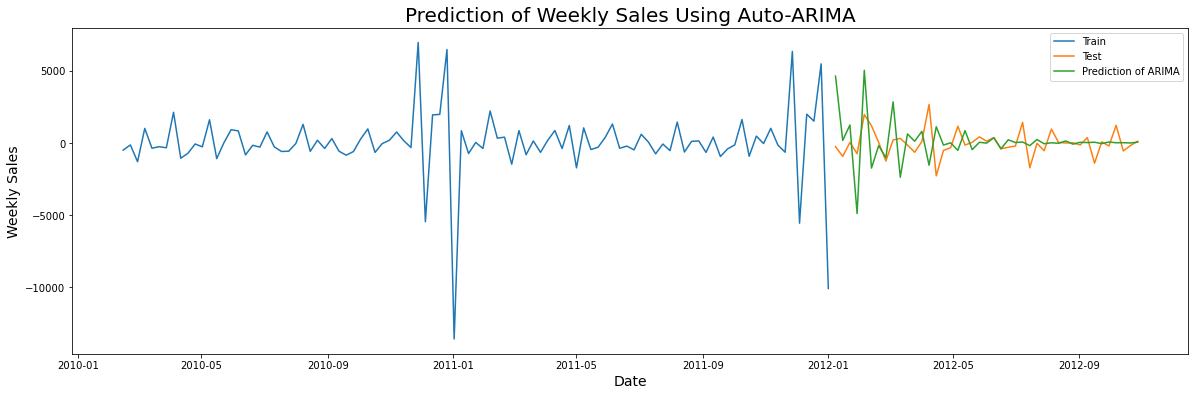

In [75]:
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

### ExponentialSmoothing

In [76]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


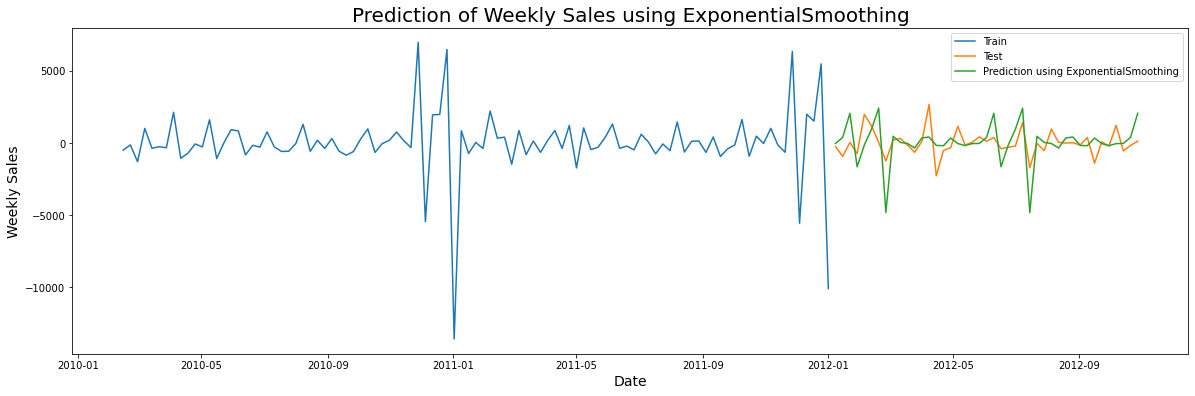

In [77]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [78]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [79]:
wmae_test(test_data_diff, y_pred)

840.6810609666959

At the end, I found best results for my data with Exponential Smoothing Model.